SPEECH RECOGNITION WITH WAV2VEC2 :https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html

#Automatic Speech Recognition (ASR)
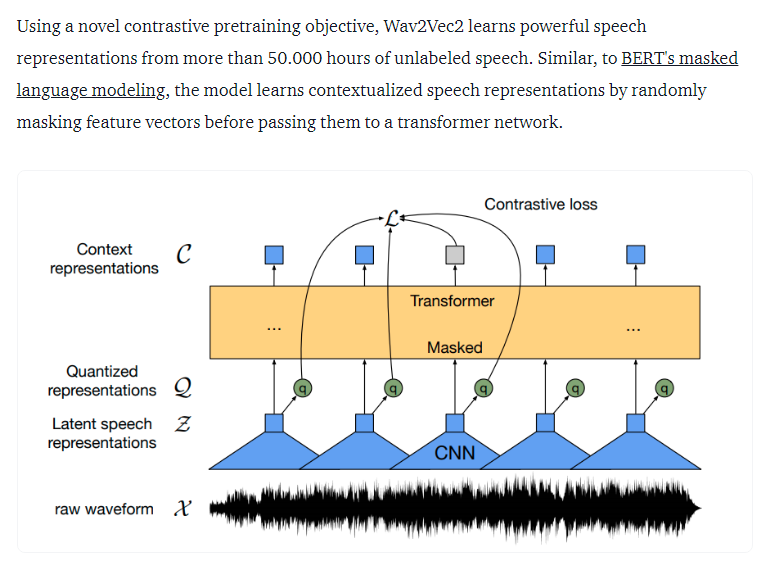

In [1]:
%matplotlib inline

import os

import IPython
import matplotlib
import matplotlib.pyplot as plt
import requests
import torch
import torchaudio

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

torch.random.manual_seed(0)
device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else 

print(torch.__version__)
print(torchaudio.__version__)
print(device)

SPEECH_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"  # noqa: E501
SPEECH_FILE = "_assets/speech.wav"

if not os.path.exists(SPEECH_FILE):
    os.makedirs("_assets", exist_ok=True)
    with open(SPEECH_FILE, "wb") as file:
        file.write(requests.get(SPEECH_URL).content)

1.10.1
0.10.1
cpu


In [2]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

print("Sample Rate:", bundle.sample_rate)

print("Labels:", bundle.get_labels())
model = bundle.get_model().to(device)

print(model.__class__)

Sample Rate: 16000
Labels: ('<s>', '<pad>', '</s>', '<unk>', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')
<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [3]:
IPython.display.Audio(SPEECH_FILE)

In [4]:
waveform, sample_rate = torchaudio.load(SPEECH_FILE)
waveform = waveform.to(device)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

In [5]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)

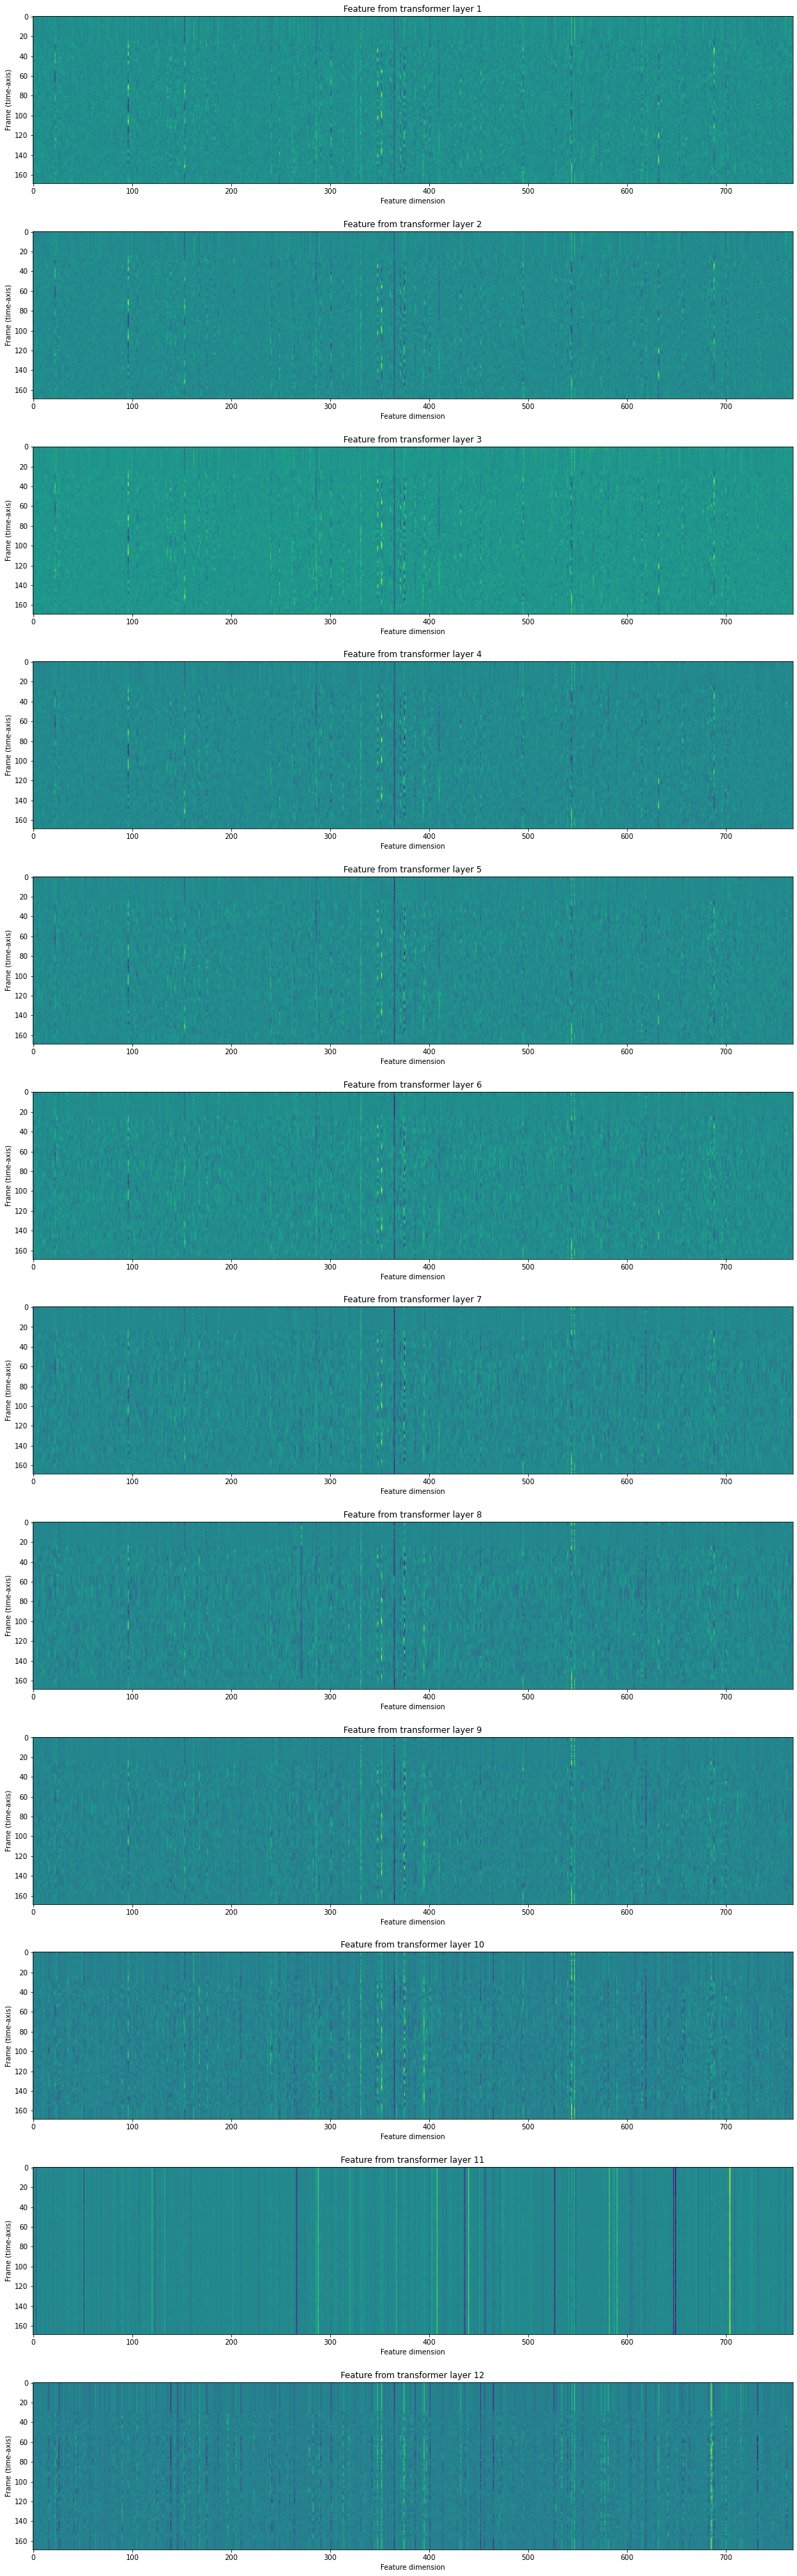

In [6]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu())
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [7]:
with torch.inference_mode():
    emission, _ = model(waveform)

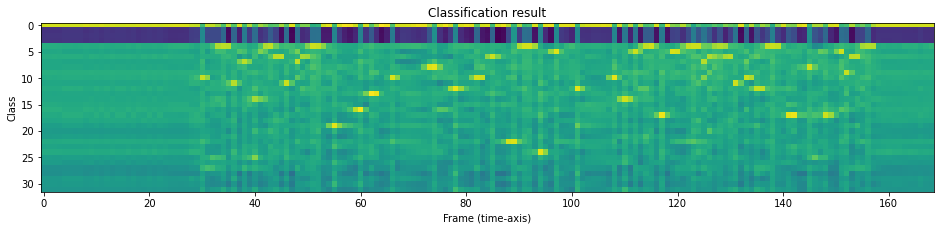

Class labels: ('<s>', '<pad>', '</s>', '<unk>', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [8]:
plt.imshow(emission[0].cpu().T)
plt.title("Classification result")
plt.xlabel("Frame (time-axis)")
plt.ylabel("Class")
plt.show()
print("Class labels:", bundle.get_labels())

In [9]:
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """Given a sequence emission over labels, get the best path string
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          str: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        return "".join([self.labels[i] for i in indices])

In [10]:
decoder = GreedyCTCDecoder(labels=bundle.get_labels())
transcript = decoder(emission[0])

In [11]:
print(transcript)
IPython.display.Audio(SPEECH_FILE)

I|HAD|THAT|CURIOSITY|BESIDE|ME|AT|THIS|MOMENT|


### I)Applying Speech Recognition to my own DATA: (vocals) 

In [12]:
import os
import glob
from pathlib import Path

In [13]:
path_str=r'./Seperation/'
D_Genres=dict()
L_Songs=[]
for i in range(len(os.listdir(path_str))):
    path=Path(path_str+"/"+os.listdir(path_str)[i])
    L_paths= [x for x in path.glob('**/*.wav') if x.is_file()]
    L_paths_str=[str(x) for x in path.glob('**/*.wav') if x.is_file()]
    for file in L_paths_str:
        if "vocals" in file:
            L_Songs.append(file)
    D_Genres[path_str+"/"+os.listdir(path_str)[i]]=L_Songs
    for z in D_Genres.keys():
        print(z)
    print(len(L_Songs))

./Seperation//Bass
4
./Seperation//Bass
./Seperation//Chill
8
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
12
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
16
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
./Seperation//Dubstep
21
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
./Seperation//Dubstep
./Seperation//Electronic
25
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
./Seperation//Dubstep
./Seperation//Electronic
./Seperation//Future House
29
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
./Seperation//Dubstep
./Seperation//Electronic
./Seperation//Future House
./Seperation//Glitch Hop
33
./Seperation//Bass
./Seperation//Chill
./Seperation//Drum & Bass
./Seperation//Drumstep
./Seperation//Dubstep
./Seperation//Electronic
./Seperation//Future House
./Seperatio

In [14]:
import soundfile as sf
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

Transcribe audio with python :https://pythonbasics.org/transcribe-audio/

In [15]:
!pip3 install ffmpeg 
!pip3 install libav
!pip3 install pydub

^C


ERROR: Could not find a version that satisfies the requirement libav
ERROR: No matching distribution found for libav
ERROR: Could not find a version that satisfies the requirement pydub
ERROR: No matching distribution found for pydub


In [16]:
import pydub
from pydub import AudioSegment
def from_mp3_to_wav(src):                                                              
    src = "transcript.mp3"
    dst = src[:-4]+".wav"
    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")

ModuleNotFoundError: No module named 'pydub'

In [ ]:
# import required modules
import subprocess
def from_mp3_to_wav_2(src):  
    src=r".\\"+src
    dst = src[:-4]+".wav"                                                   
    # convert mp3 to wav file
    subprocess.call(['ffmpeg',
                     '-i',
                     src,
                     dst])

In [17]:
L_Songs[0]

'Seperation\\Bass\\Lost-Sky---Where-We-Started-feat.-Jex_vocals.wav'

In [ ]:
from os import path
for List_of_paths in D_Genres.values():
    for acapella in List_of_paths:
        waveform, sample_rate = torchaudio.load(acapella)
        waveform.cuda()
        if sample_rate != bundle.sample_rate:
            waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
        with torch.inference_mode():
            emission, _ = model(waveform)
        decoder = GreedyCTCDecoder(labels=bundle.get_labels())
        transcript = decoder(emission[0])
        print(transcript)
        IPython.display.Audio(acapella)
        break
    break

  Using cached ffmpeg-1.4.tar.gz (5.1 kB)
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6081 sha256=a9305d69ad05e52606bf7a6d5a6eba9a16d6256223aea9f1b332c1d38ac51efd
  Stored in directory: c:\users\aymen\appdata\local\pip\cache\wheels\64\80\6e\caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [ ]:
print(acapella)
IPython.display.Audio(acapella)

In [38]:
Transcript_=" ".join(map(str,transcript.split("|")))
Transcript_

'THE PA W MA MONEY GAT AGAT OTE FI AN A O WA ON NLF MI N O SL O SELF AN MYSO TIIN ANNO JST A FY SOM AWAANF A TIS NI COM O O HI A O ANSO O THIND AN O O AO TE MO  O WIN O MO O SIG IN SA MAN SO O SE IN  OO I SIN N  Y SAN MAN SO  O MI O I WA BACK SEOWAY OA STA YO GET   O NW O IT WA OT  YO GET W OO NO YOIN WA ATI WEL N O  O GIN WAY  WHO BROE AN NOTTIN  AND STO ON FI TO ON IN TRU A I GAT AGATE O  E STOU WEST AN SAN YET WA ON OF I  O A O SEL O SELF AN FY SO I N O JUST A FY SOM WAY AN FINELY '

In [39]:
#fle = Path(r'.'+acapella[:-3]+"txt")
#fle.touch(exist_ok=True)
# open file in write mode
path_0=acapella[:-3]+"txt"
print(path_0)
with open("./"+path_0, 'w+') as fp:
    for item in transcript.split("|"):
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
fp.close()

Seperation\Bass\Lost-Sky---Where-We-Started-feat.-Jex_vocals.txt
Done


### SVD, NMF, Topic Modeling :<br>
https://www.kaggle.com/code/deborareis/svd-nmf-topic-modeling <br>
http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/
https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

### Audio Data augmentation: <br> https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html#snr-3-db ###

### II)Music Audio Feature extraction for ML : ###